In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import re
!pip install emoji
import emoji
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.5 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df = pd.read_csv("VideoComments.csv")

# Filas superiores
df.head(5)

# Filas inferiores
df.tail(5)
df.shape


(17924, 3)

In [ ]:
# Comprobar tipo de datos del dataset

df.dtypes

,0
VideoID,object
Comentario,object
Fecha,object


In [ ]:
# Dimensiones del dataset
df.shape

(17924, 3)

In [ ]:
# Eliminar filas duplicadas
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (9, 3)


In [ ]:
# Contar filas
df.count()

,0
VideoID,17924
Comentario,17924
Fecha,17924


In [ ]:
# Eliminar duplicados y mostrar primeras filas de nuevo
df = df.drop_duplicates()
df.head(5)

,VideoID,Comentario,Fecha
0,2Btx6xU8Aw4,dios mio que risa ghassan... &quot;te cortaste...,2024-09-23T12:31:14Z
1,2Btx6xU8Aw4,el discurso de cynthia es brutal,2024-09-23T12:28:25Z
2,2Btx6xU8Aw4,tendría sentido que llevaras un vestido de tu ...,2024-09-23T12:11:13Z
3,2Btx6xU8Aw4,Qué pechada a llorar con el discurso de tu her...,2024-09-23T09:51:41Z
4,2Btx6xU8Aw4,No estoy llorando 🥲🥲🥹🥹🥹🥹,2024-09-23T09:41:37Z


In [ ]:
# Contar filas de nuevo
df.count()

,0
VideoID,17915
Comentario,17915
Fecha,17915


In [ ]:
# Posible codigo para eliminacion de nulos (no necesario en este caso)
print(df.isnull().sum())

# Si fuera necesario suprimir nulos hariamos lo siguiente
df = df.dropna()    # Dropping the missing values.
df.count()
print(df.isnull().sum())

VideoID       0
Comentario    0
Fecha         0
dtype: int64
VideoID       0
Comentario    0
Fecha         0
dtype: int64


In [ ]:
# Instalacion de modulo de traduccion de Google para comprobar el rendimiento
!pip install googletrans==4.0.0-rc1
from googletrans import Translator
translator = Translator()

def translate_to_english(comment):
    return translator.translate(comment, src='es', dest='en').text


In [ ]:
# DataFrame es df y tiene una columna 'Comentario'
df['Comentario_Traducido'] = df['Comentario'].apply(translate_to_english)

# Compilar el patron de hyperlinks
hyperlink_pattern = re.compile(
    r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
)

# Umbral para la proporcion de texto/emojis
threshold_ratio = 0.65

# Lista para comentarios relevantes
relevant_comments = []

# Iterar sobre la columna 'Comentario'
for comment_text in df['Comentario_Traducido']:
    comment_text = comment_text.lower().strip()

    # Contar emojis en el comentario
    emojis = emoji.emoji_count(comment_text)

    # Contar caracteres de texto (excluyendo espacios)
    text_characters = len(re.sub(r'\s', '', comment_text))

    # Condiciones para agregar comentarios relevantes
    if (any(char.isalnum() for char in comment_text)) and not hyperlink_pattern.search(comment_text):
        if emojis == 0 or (text_characters / (text_characters + emojis)) > threshold_ratio:
            relevant_comments.append(comment_text)

# Imprimir los primeros 5 comentarios relevantes
print(relevant_comments[:100])

In [ ]:
def sentiment_scores(comment, polarity):

    # Creating a SentimentIntensityAnalyzer object.
    sentiment_object = SentimentIntensityAnalyzer()

    sentiment_dict = sentiment_object.polarity_scores(comment)
    polarity.append(sentiment_dict['compound'])

    return polarity

In [ ]:
polarity = []
positive_comments = []
negative_comments = []
neutral_comments = []

f = open("VideoComments.csv", 'r', encoding='utf-8')
comments = f.readlines()
f.close()
print("Analysing Comments...")
for index, items in enumerate(comments):
    polarity = sentiment_scores(items, polarity)

    if polarity[-1] > 0.05:
        positive_comments.append(items)
    elif polarity[-1] < -0.05:
        negative_comments.append(items)
    else:
        neutral_comments.append(items)

# Print polarity
polarity[:5]

Analysing Comments...


[0.0, 0.0, 0.0, -0.296, 0.0]

In [ ]:
avg_polarity = sum(polarity)/len(polarity)
print("Average Polarity:", avg_polarity)
if avg_polarity > 0.05:
    print("The Video has got a Positive response")
elif avg_polarity < -0.05:
    print("The Video has got a Negative response")
else:
    print("The Video has got a Neutral response")

print("The comment with most positive sentiment:", comments[polarity.index(max(
    polarity))], "with score", max(polarity), "and length", len(comments[polarity.index(max(polarity))]))
print("The comment with most negative sentiment:", comments[polarity.index(min(
    polarity))], "with score", min(polarity), "and length", len(comments[polarity.index(min(polarity))]))

Average Polarity: 0.010357015341701687
The Video has got a Neutral response
The comment with most positive sentiment: Hj6XpmptgzI,Bravo another great video. Ghassan is great doing his portion of content. He should have his own channel about his point of view on things and funny comments.😂 Love it😚❤<br>Greetings from California 👋<br>P.S. I hope you can do a meet &amp; greet in California. It would be a great opportunity for Sasha to experience Disneyland  (the original),2023-11-30T20:45:58Z
 with score 0.9806 and length 377
The comment with most negative sentiment: kFApU5WbQEE,"Pero que tristeza de video! El pobre Ghass había dicho que quería un cumpleaños en familia y con amigos y el pobre hombre sopla cuatro velas de una triste mini tarta, sentado en la cama, con cara de triste. Tu anti sociabilidad te ha llevado a que tu marido festeje su 40 cumpleaños solo, sin familia ni  amigos, en una triste isla y con una mujer con la que a las claras está teniendo una crisis y un bebé al que lo

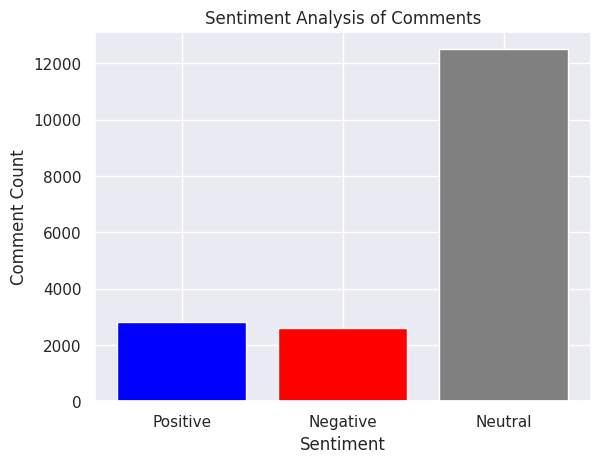

In [ ]:
positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

# Creating bar chart
plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])

# Adding labels and title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Sentiment Analysis of Comments')

# Displaying the chart
plt.show()

También podemos trazar un gráfico circular para el mismo gráfico usando el siguiente código en el que primero configuramos el tamaño de la figura usando la función figure() y el parámetro figsize que establece las dimensiones en pulgadas, configurándolo como 10 pulgadas de ancho y 6 pulgadas de alto.
Luego, utilizando la función pie(), trazamos un gráfico circular usando el recuento de comentarios y etiquetas respectivos como parámetros.

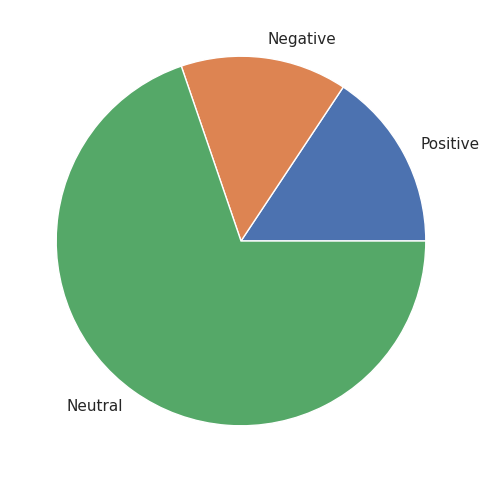

In [ ]:
# labels and data for Bar chart
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

plt.figure(figsize=(10, 6)) # setting size

# plotting pie chart
plt.pie(comment_counts, labels=labels)

# Displaying Pie Chart
plt.show()

Sentiment    Negative  Neutral  Positive
VideoID                                 
0X7pxpbGRLU       157      533       136
1PkcfoUOXck       104      354       126
2Btx6xU8Aw4        42      256        90
3HLHTshpjEU        37      146        39
4JMU1IeHhAg        38      163        52
5BZwUNoW2dc        57      242        59
5lY2vSt6j_Q        75      274        55
7x5-ky2TY38        60      372       110
91mUFlUiZ5E        40      207        53
Ad8D9uiqh6s        52      217        37
ArM7vL9S1X8        75      243        60
C230bFLGpdY        45      218       103
COAt8YzVQyo        61      301        63
Dbn08LWFlhU        73      308        64
EeHB3pwruvg        59      175        46
FxZHCOZS8kQ        30      185        25
GSoGQKchuRo        55      258        70
Hj6XpmptgzI        42      206        62
IY7Awxz59wc         6       60         4
J4GcszpDF4U        65      260        78
JVgdSpBr28g        32      182        39
JayLlnmItcY        63      303        80
LjeXnbEy50U     

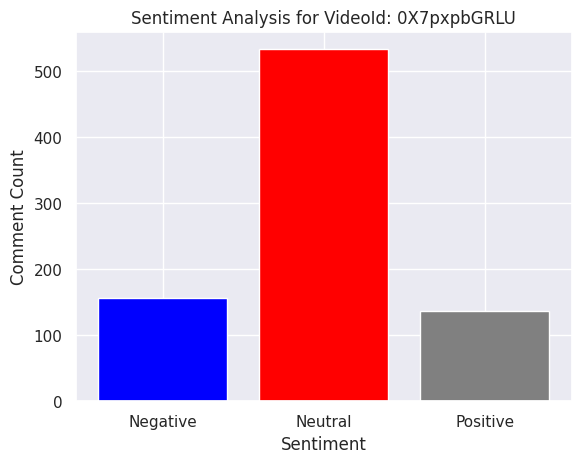

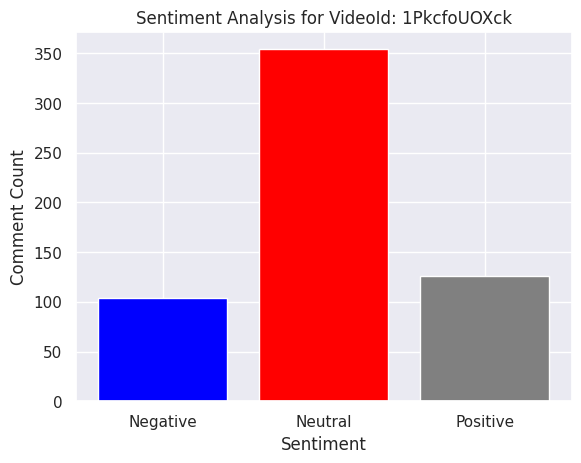

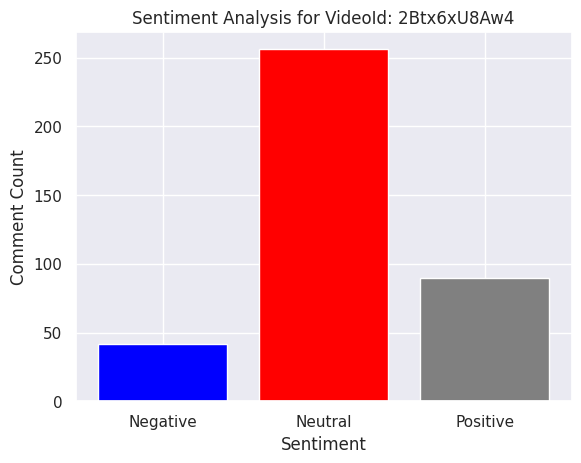

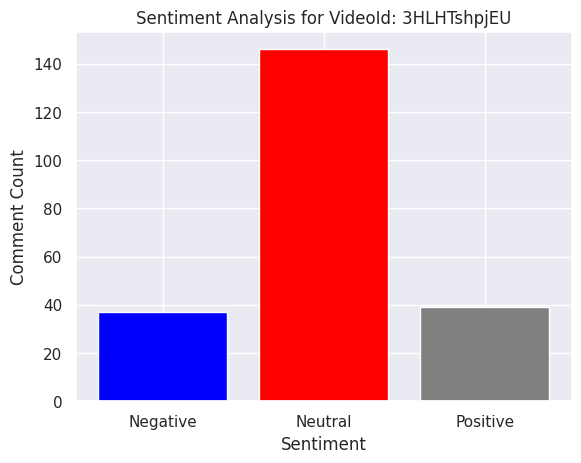

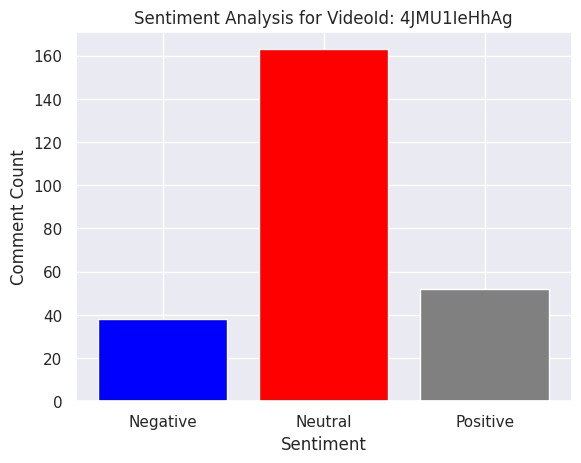

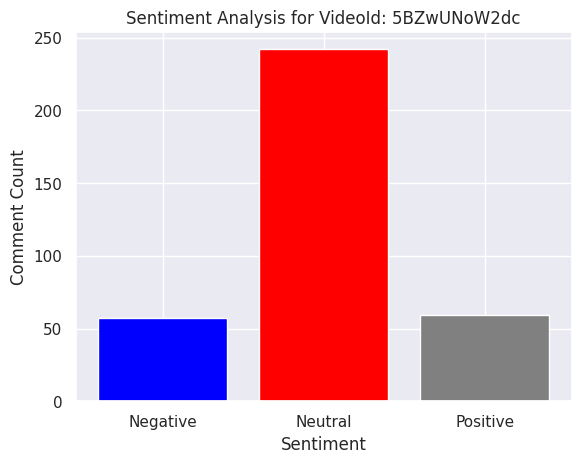

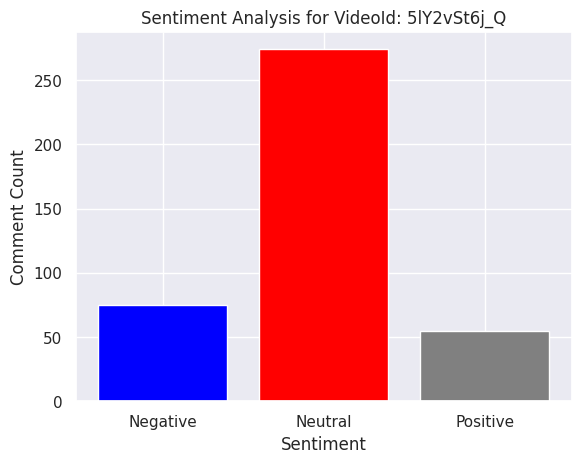

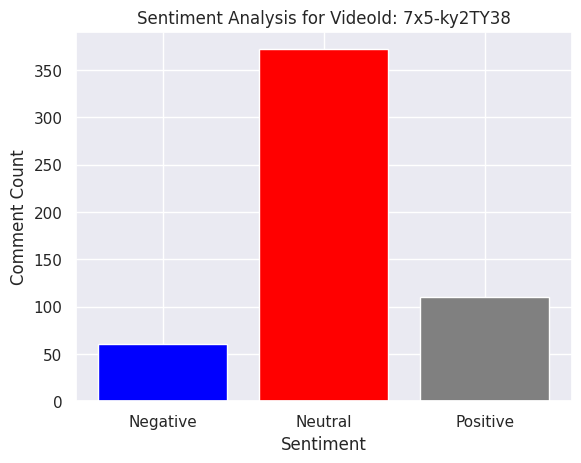

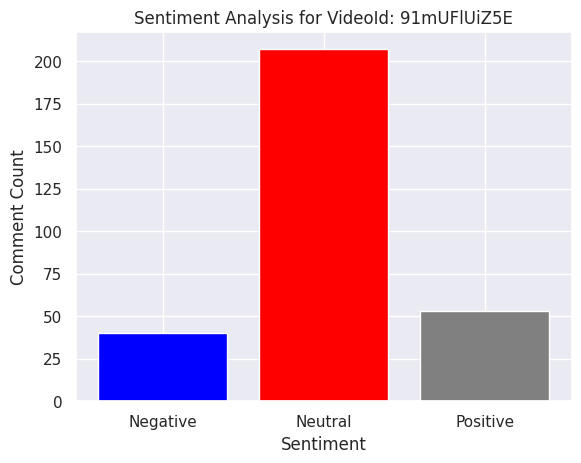

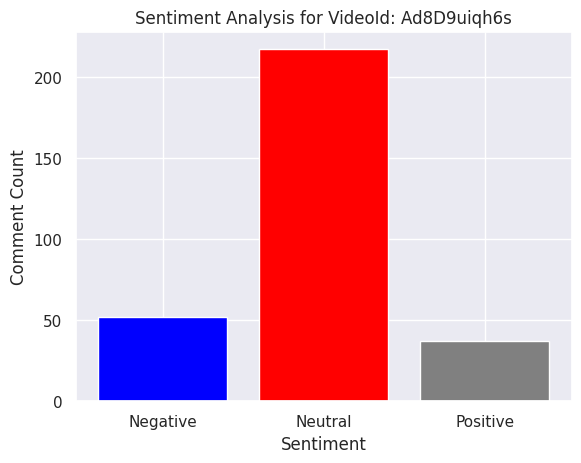

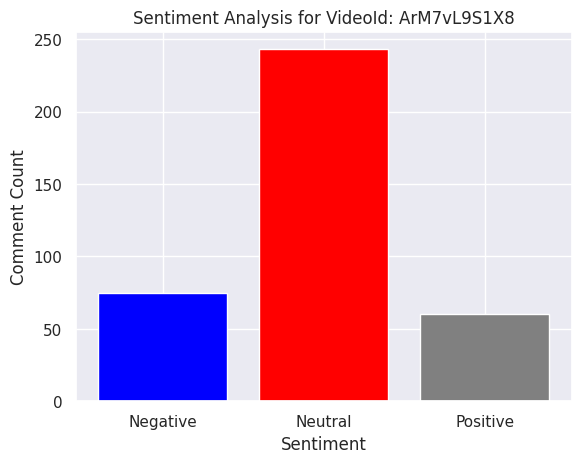

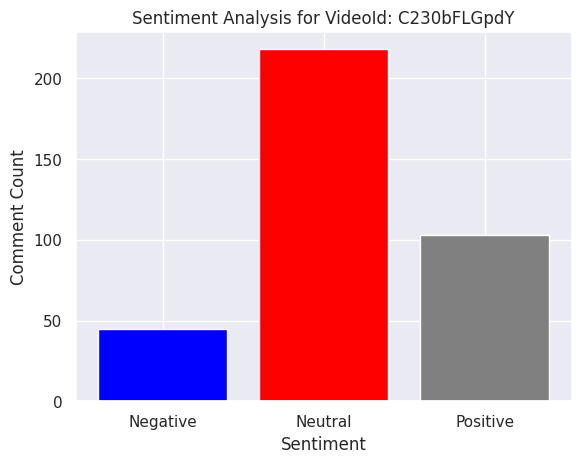

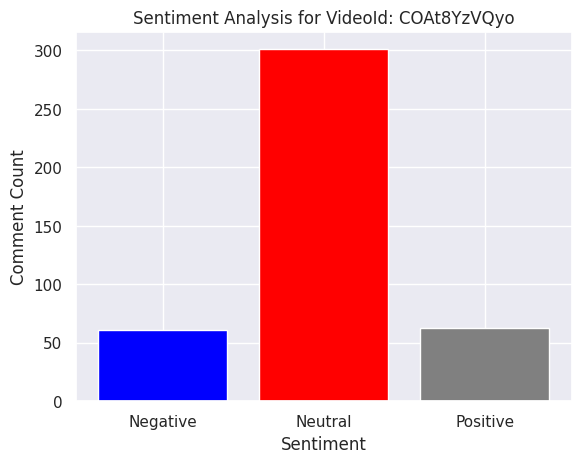

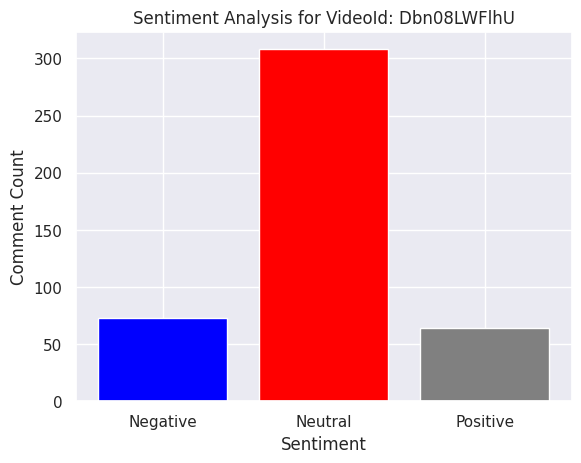

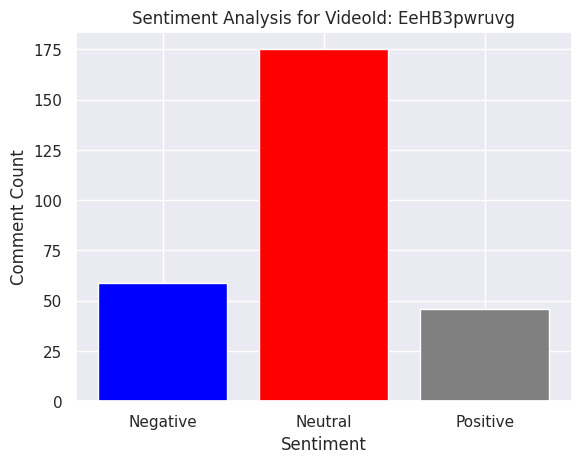

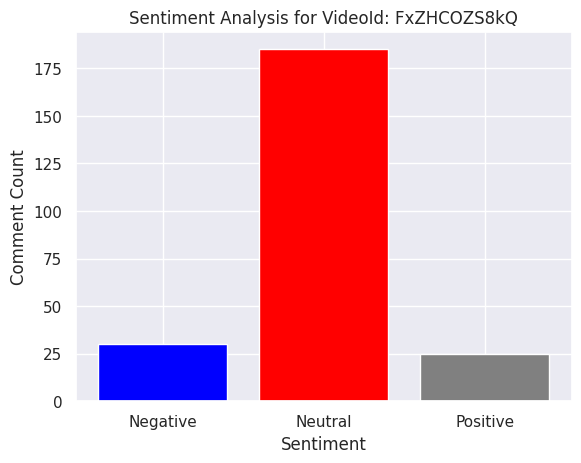

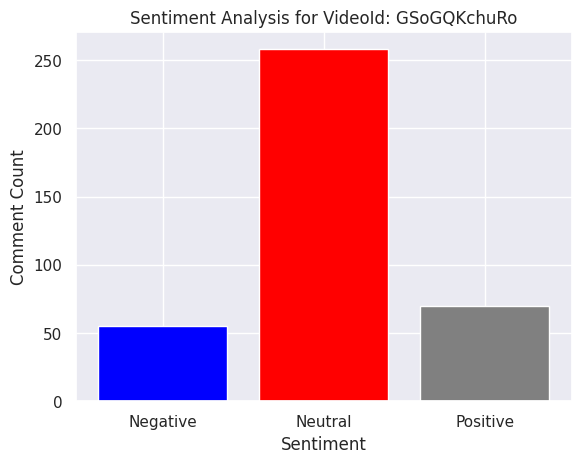

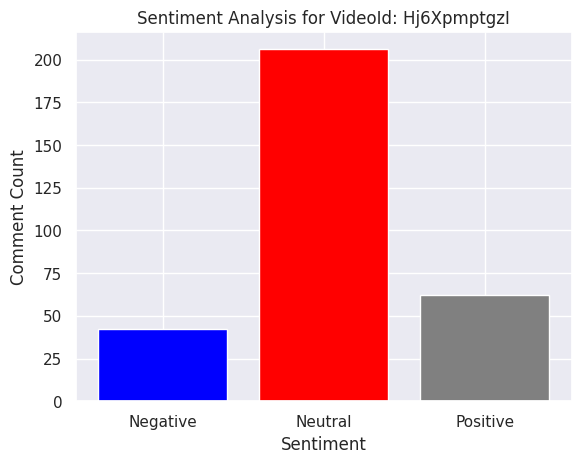

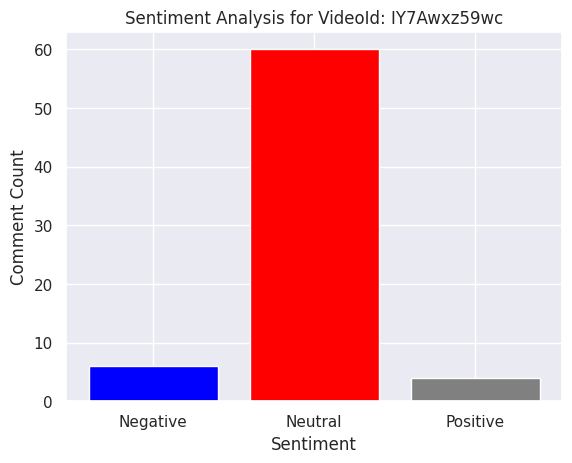

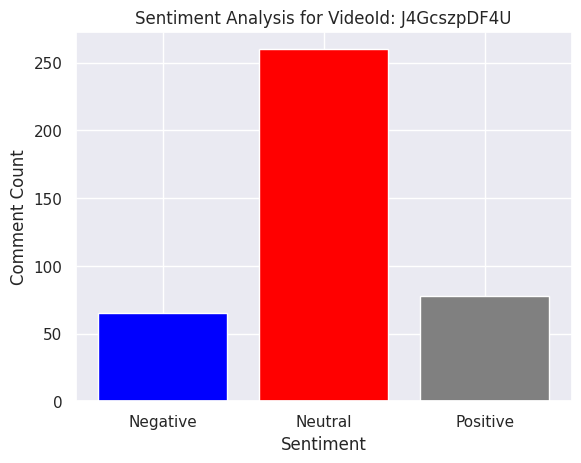

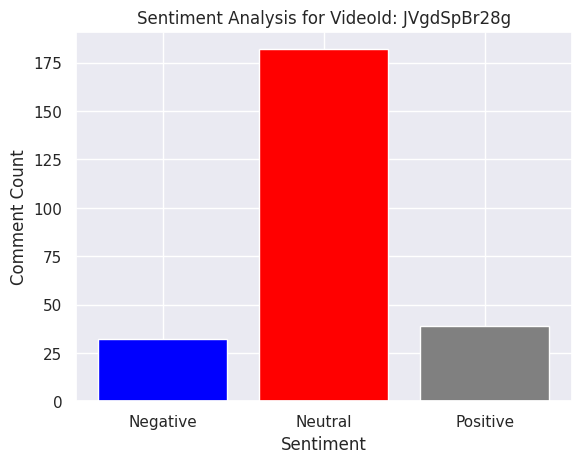

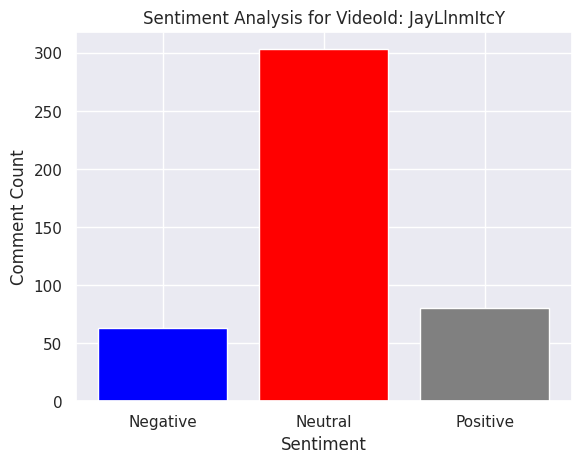

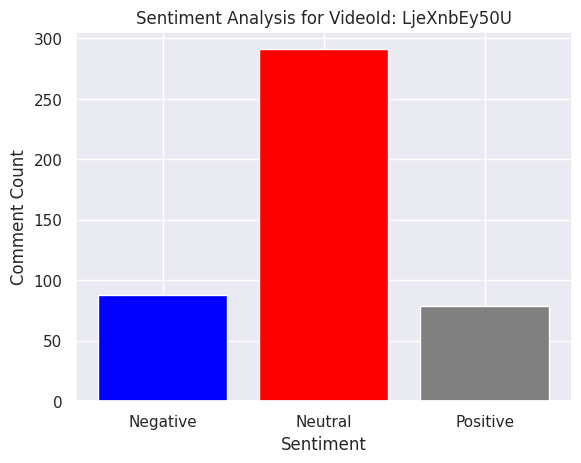

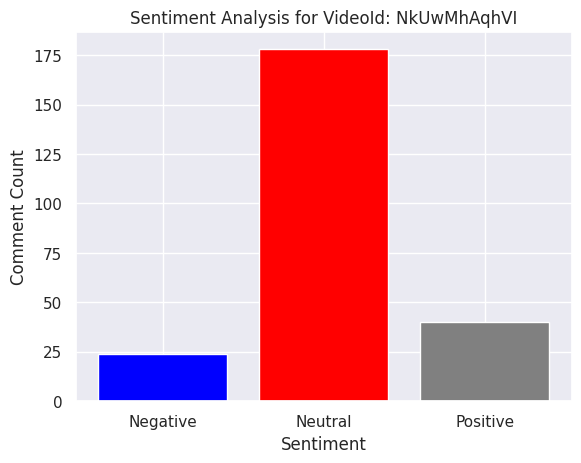

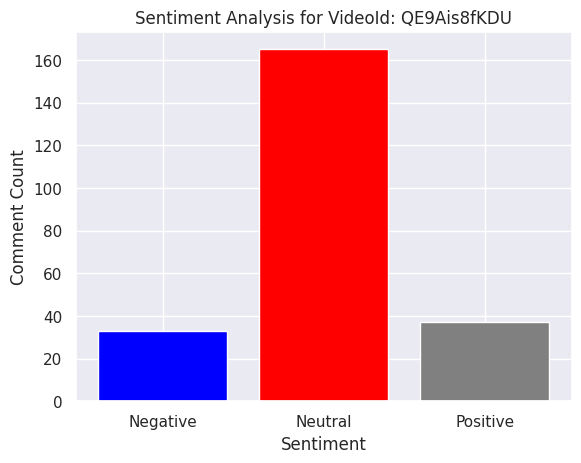

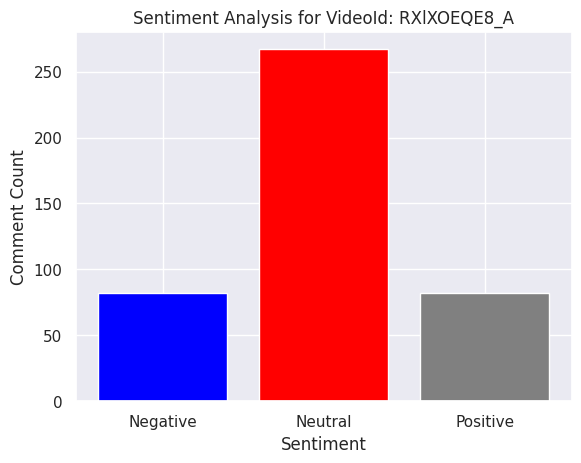

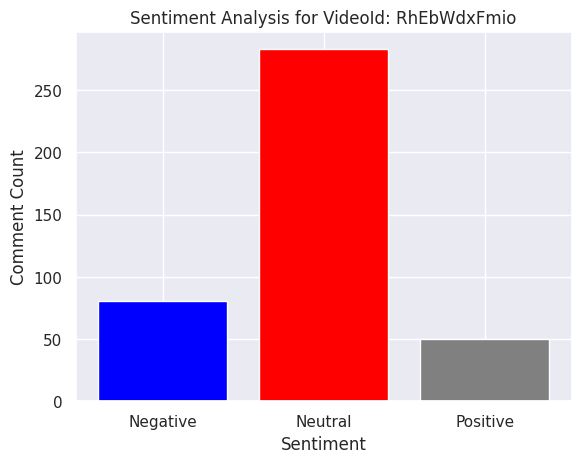

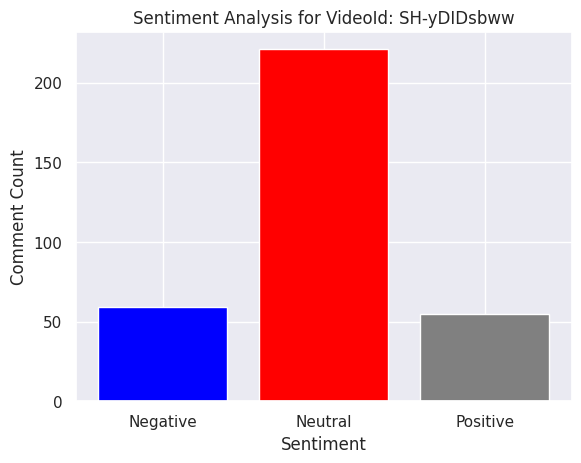

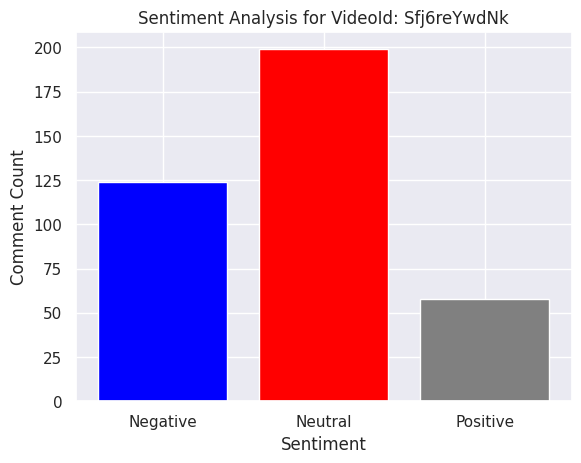

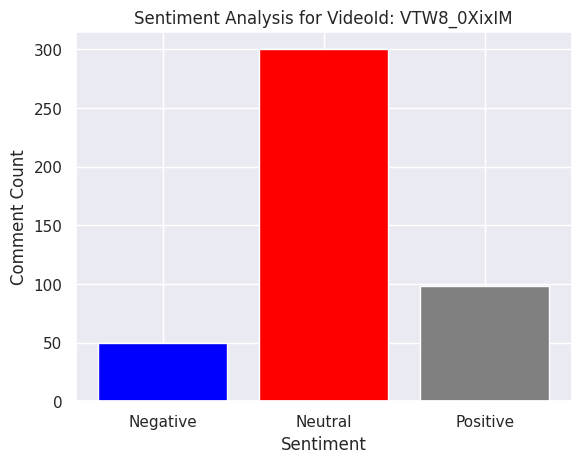

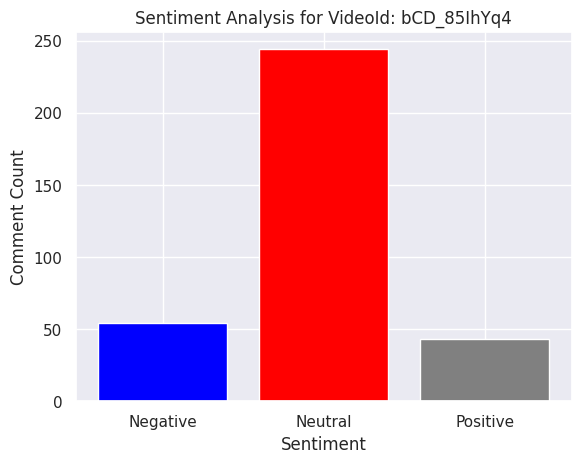

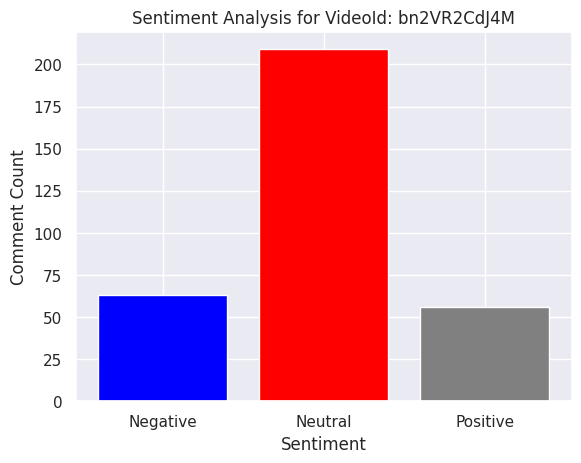

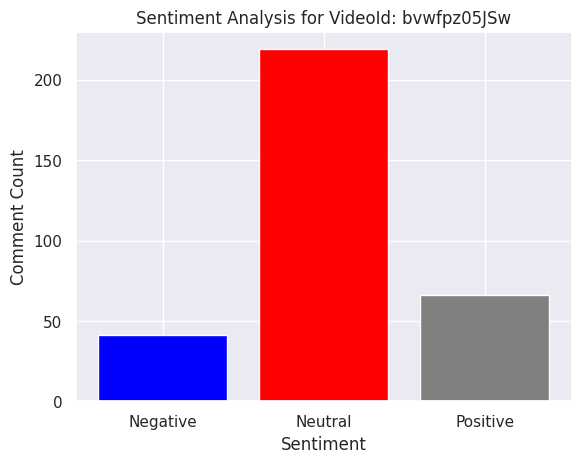

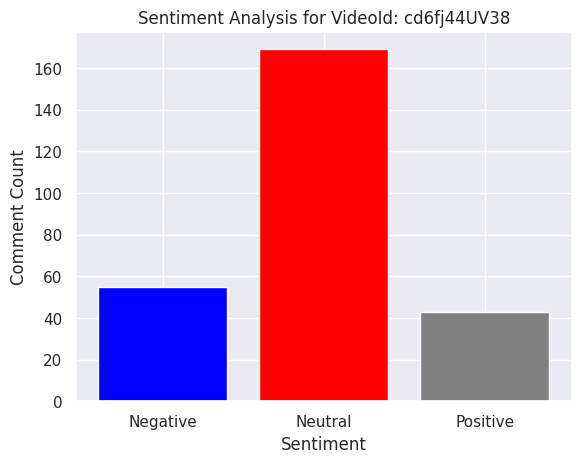

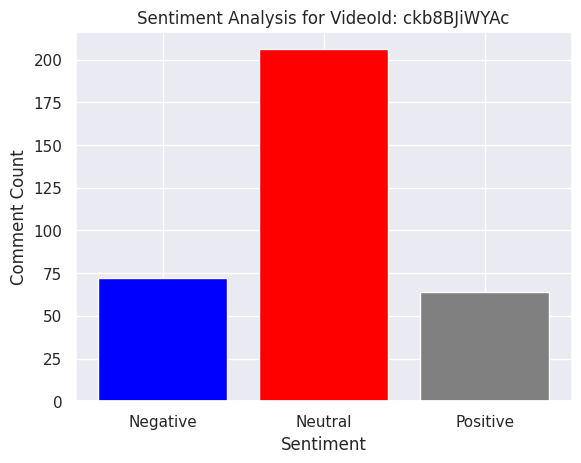

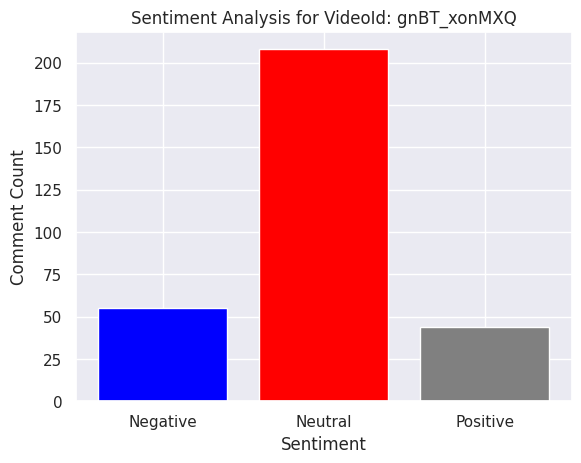

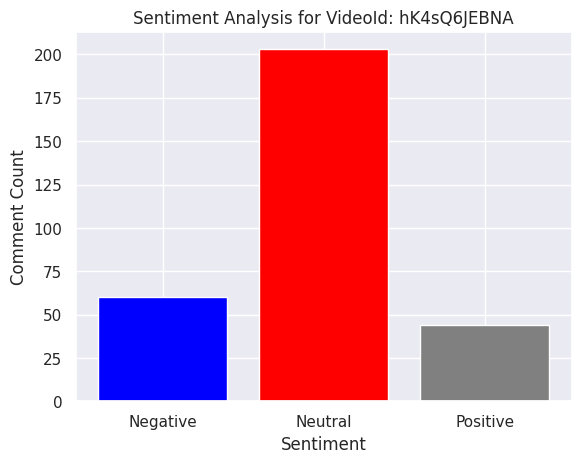

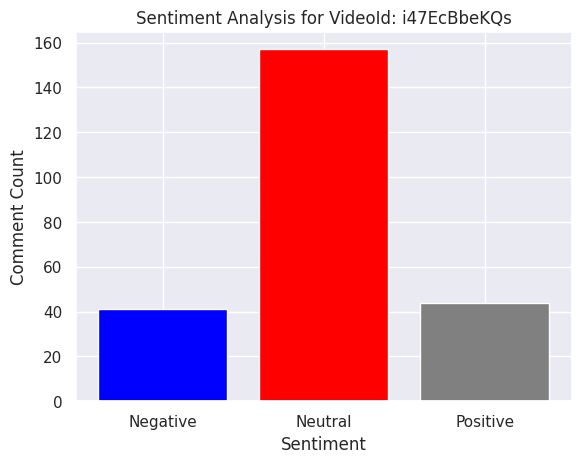

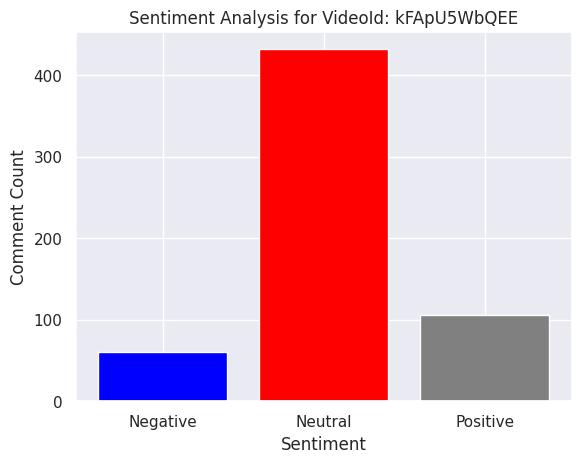

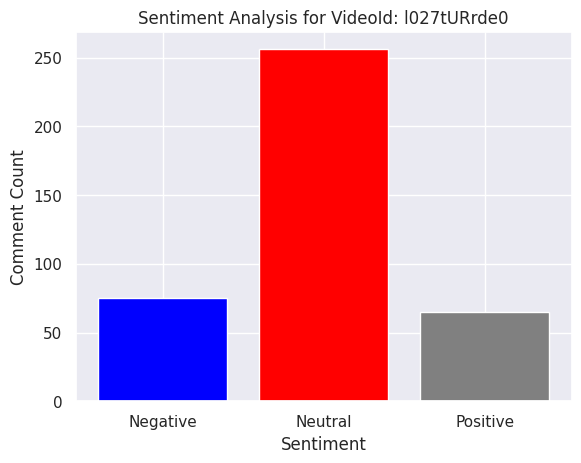

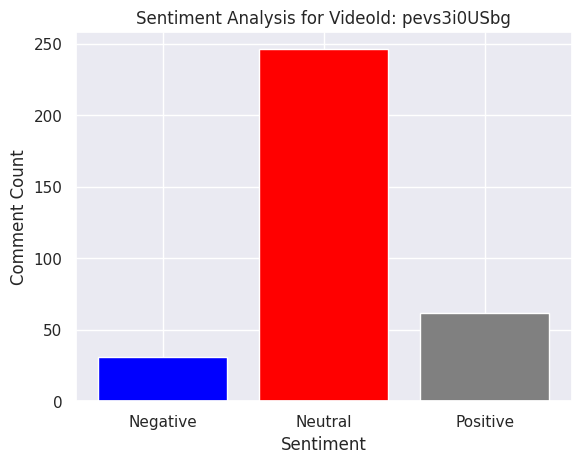

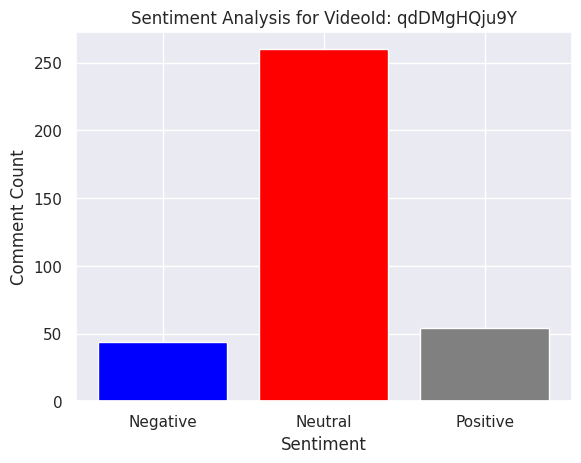

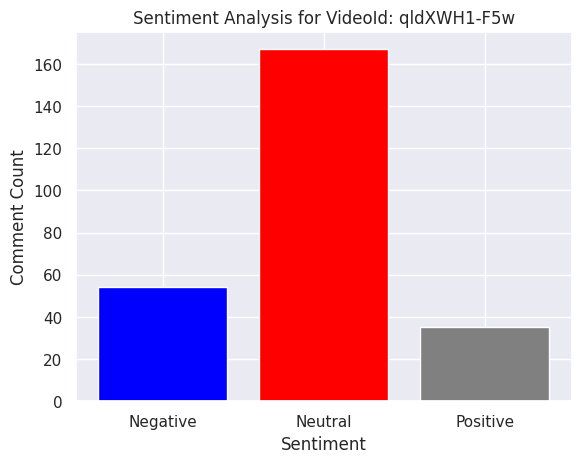

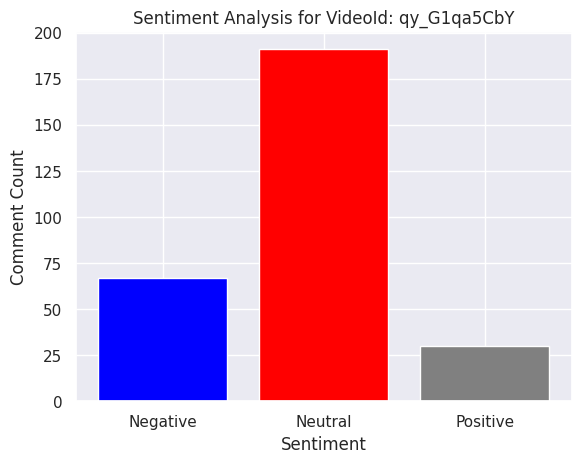

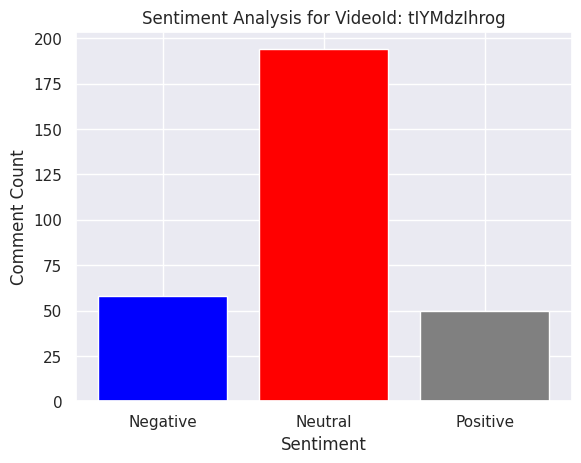

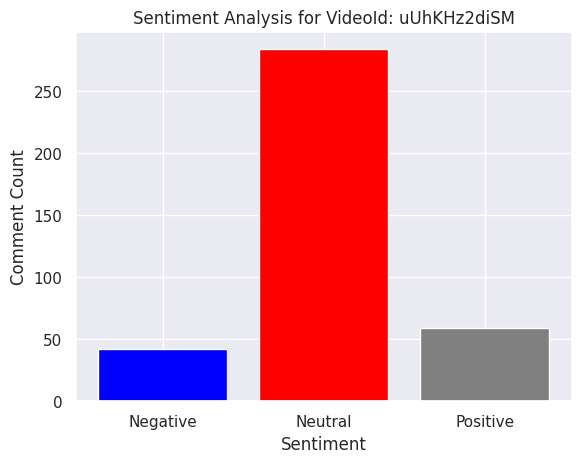

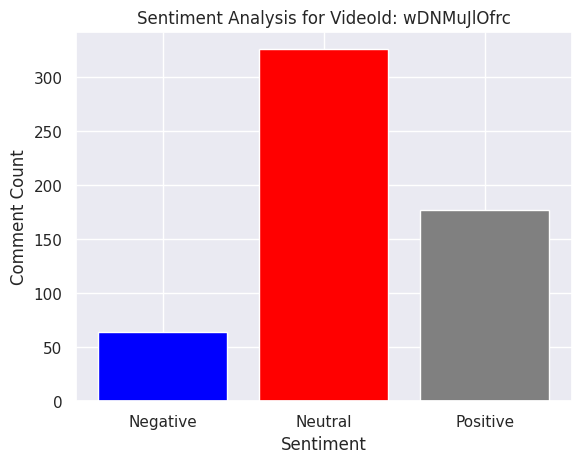

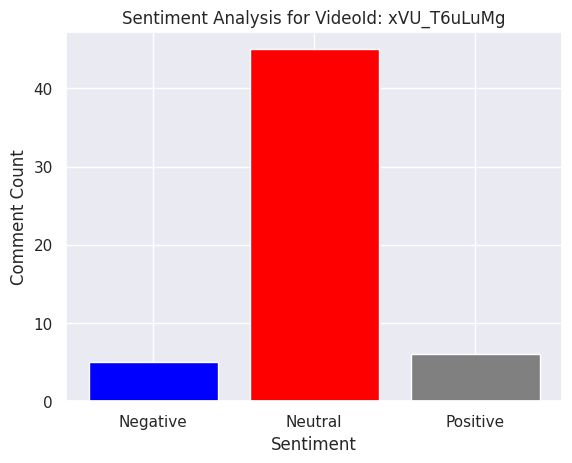

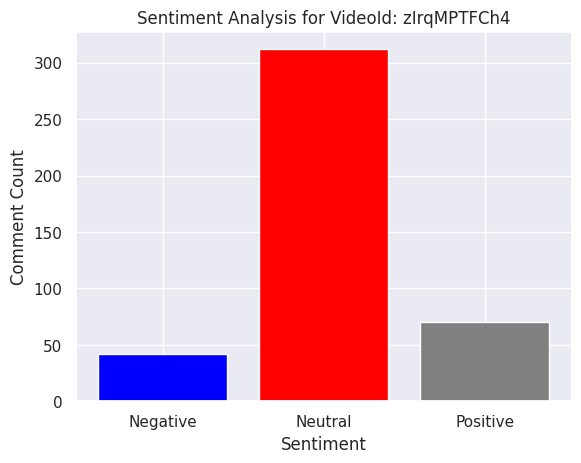

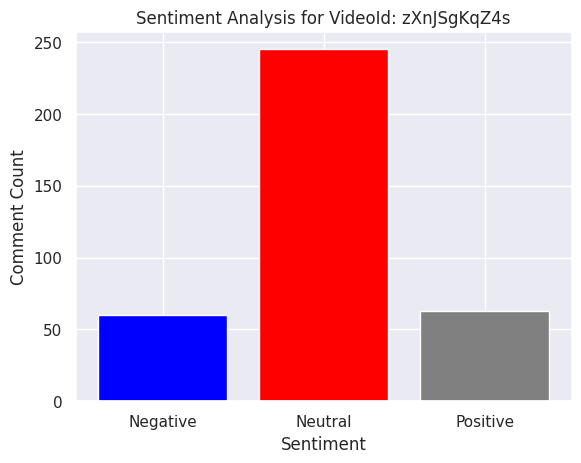

In [ ]:
import pandas as pd
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Leer datos desde un archivo CSV en un DataFrame
df = pd.read_csv("VideoComments.csv", encoding='utf-8')

# Crear objeto de analisis de sentimientos
sentiment_object = SentimentIntensityAnalyzer()

# Funcion para calcular la polaridad de un comentario
def sentiment_scores(comment):
    sentiment_dict = sentiment_object.polarity_scores(comment)
    return sentiment_dict['compound']

# Agregar una nueva columna con la polaridad
df['Polarity'] = df['Comentario'].apply(sentiment_scores)

# Clasificar comentarios por polaridad
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')

# Agrupar por VideoId y contar comentarios por polaridad
grouped_sentiments = df.groupby(['VideoID', 'Sentiment']).size().unstack(fill_value=0)

# Mostrar los primeros resultados
print(grouped_sentiments)

# Generar un grafico para cada VideoId
for video_id, group in grouped_sentiments.iterrows():
    labels = group.index
    counts = group.values

    # Crear grafico de barras
    plt.bar(labels, counts, color=['blue', 'red', 'grey'])

    # Configurar etiquetas y titulo
    plt.xlabel('Sentiment')
    plt.ylabel('Comment Count')
    plt.title(f'Sentiment Analysis for VideoId: {video_id}')

    # Mostrar grafico
    plt.show()


In [ ]:
!pip install textblob

from textblob import TextBlob
import pandas as pd

# Leer datos desde un archivo CSV en un DataFrame
df = pd.read_csv("VideoComments.csv", encoding='utf-8')

# Funcion para calcular la polaridad de un comentario
def sentiment_scores(comment):
    sentiment = TextBlob(comment).sentiment.polarity
    return sentiment

# Agregar una nueva columna con la polaridad
df['Polarity'] = df['Comentario'].apply(sentiment_scores)

# Clasificar comentarios por polaridad
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')

# Agrupar por VideoId y contar comentarios por polaridad
grouped_sentiments = df.groupby(['VideoID', 'Sentiment']).size().unstack(fill_value=0)

# Resetear el indice para mostrar en formato tabular
result_table = grouped_sentiments.reset_index()

# Mostrar la tabla
print("Resultados de análisis de sentimiento por VideoId:")
print(result_table)

# Guardar la tabla en un archivo CSV
result_table.to_csv("SentimentAnalysisResults.csv", index=False)



Resultados de análisis de sentimiento por VideoId:
Sentiment      VideoID  Negative  Neutral  Positive
0          0X7pxpbGRLU         4      755        67
1          1PkcfoUOXck        18      494        72
2          2Btx6xU8Aw4         3      360        25
3          3HLHTshpjEU         1      204        17
4          4JMU1IeHhAg         2      230        21
5          5BZwUNoW2dc         4      330        24
6          5lY2vSt6j_Q         2      375        27
7          7x5-ky2TY38         5      488        49
8          91mUFlUiZ5E         2      279        19
9          Ad8D9uiqh6s         5      282        19
10         ArM7vL9S1X8         2      348        28
11         C230bFLGpdY         5      331        30
12         COAt8YzVQyo         1      394        30
13         Dbn08LWFlhU         4      406        35
14         EeHB3pwruvg         1      259        20
15         FxZHCOZS8kQ         2      227        11
16         GSoGQKchuRo         2      358        23
17         Hj